# Signal processing Assignment 3
Alessandro Sardelli 561158

In [ ]:
import librosa
import soundfile as sf
import os
import numpy as np
import matplotlib.pyplot as plt
import librosa.display
import copy
from IPython.display import Audio


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
figures=[]

# Introduction 

In order to study sound signals and to plot their relative spectrograms, as suggested, I used functions provided by library Librosa. \
I took as samples 4 signals relating to the sound signal of a same note ("A4", or "LA" in italian), but played by different instruments, in particular I choose flute, guitar, trumpet and violin.\
For each signal I will present his relative wave plot, spectrogram, an highlight on his fundamental frequency (that identify a particular note, that in our case will be always 440 Hz, the FF of note "LA") and finally an isolation of his harmonic frequencies, with which derived spectrogram we will compare the different signals. \


# Generating spectrograms

## Flute

In [ ]:
flute ="./drive/MyDrive/flute/flute_A4_1_forte_normal.mp3"
Audio(flute)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


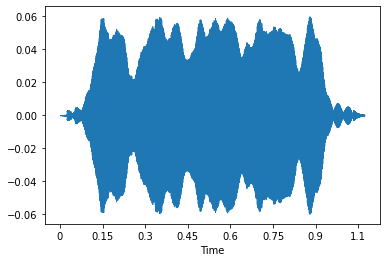

In [ ]:
y, sr = librosa.load(flute, sr=None)
librosa.display.waveshow(y, sr=sr)
S = np.abs(librosa.stft(y))

Spectrograms are generated with the Librosa's specshow function, 
the color dimension is converted from amplitude to decibels (which we can interpret as its log scale) 

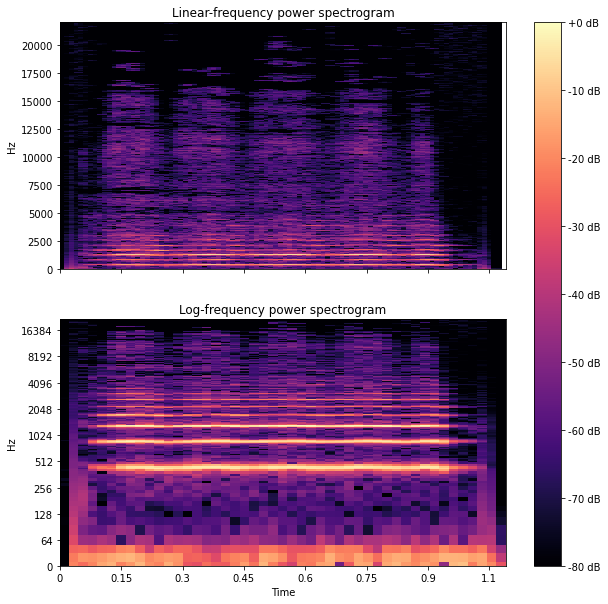

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(10,10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.0f dB")

To identify the foundamental frequency i used the YIN algorithm already implemented in Librosa, that is based on the autocorrelation method.
As already said, the fundamental frequency identify a note, in this case A4 or LA is identified by frequency 440 Hz.

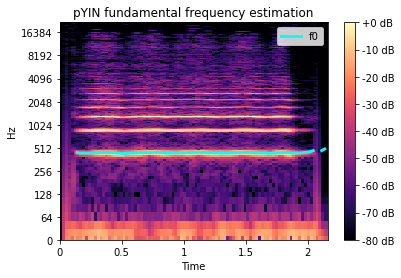

In [ ]:
f0, voiced_flag, voiced_probs = librosa.pyin(y,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'), sr=sr)
times = librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

To isolate the harmonic frequencies (that are the ones of our interest) I used the librosa decompose function, that given a sound signal return the harmonic and percussive separated signals.

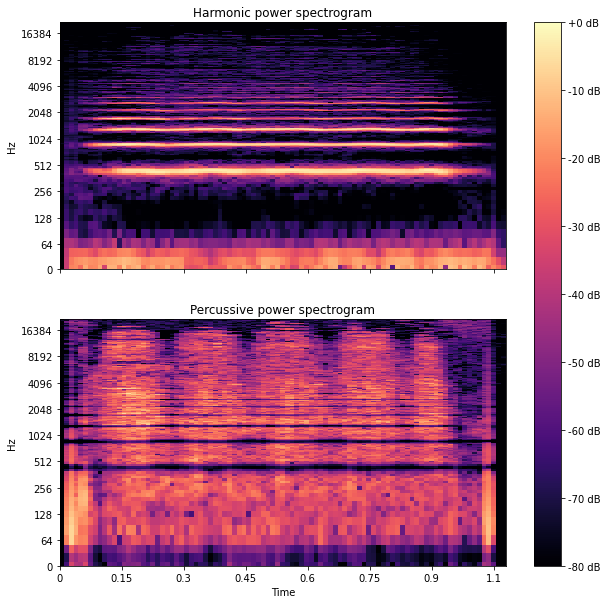

In [ ]:
H, P = librosa.decompose.hpss(S)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10,10))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[0], sr=sr)
ax[0].set(title='Harmonic power spectrogram')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P),ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[1], sr=sr)
ax[1].set(title='Percussive power spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
figures.append(H)

## Guitar

In [ ]:
guitar ='./drive/MyDrive/guitar/guitar_A4_very-long_forte_normal.mp3'
Audio(guitar)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


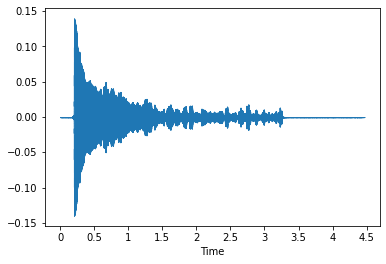

In [ ]:
y, sr = librosa.load(guitar,sr=None)
librosa.display.waveshow(y, sr=sr)
S = np.abs(librosa.stft(y))


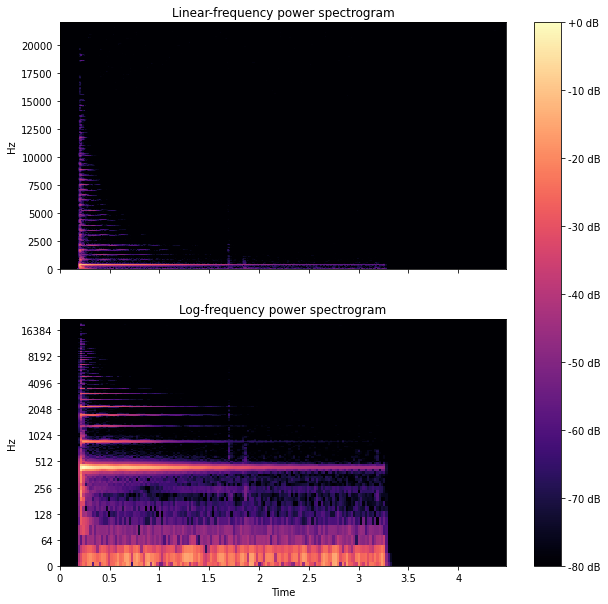

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(10,10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.0f dB")

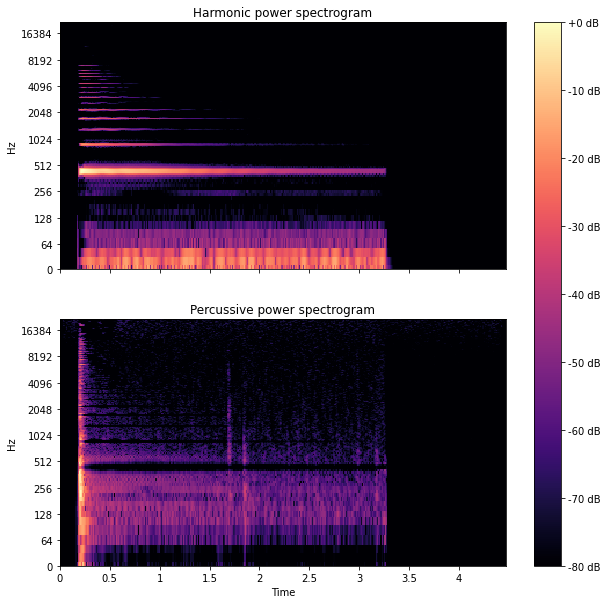

In [ ]:
H, P = librosa.decompose.hpss(S)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10,10))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[0], sr=sr)
ax[0].set(title='Harmonic power spectrogram')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P),ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[1], sr=sr)
ax[1].set(title='Percussive power spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
figures.append(H)

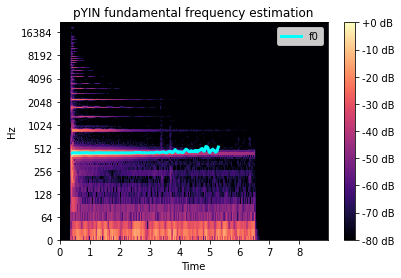

In [ ]:
f0, voiced_flag, voiced_probs = librosa.pyin(y,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'), sr=sr)
times = librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

## Trumpet

In [ ]:
trumpet = './drive/MyDrive/trumpet/trumpet_A4_1_forte_normal.mp3'
Audio(trumpet)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


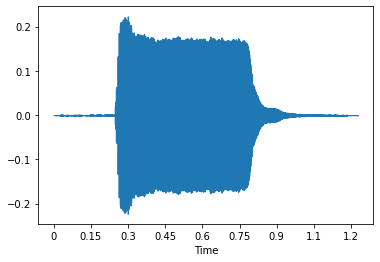

In [ ]:
y, sr = librosa.load(trumpet,sr=None)
librosa.display.waveshow(y, sr=sr)
S = np.abs(librosa.stft(y))


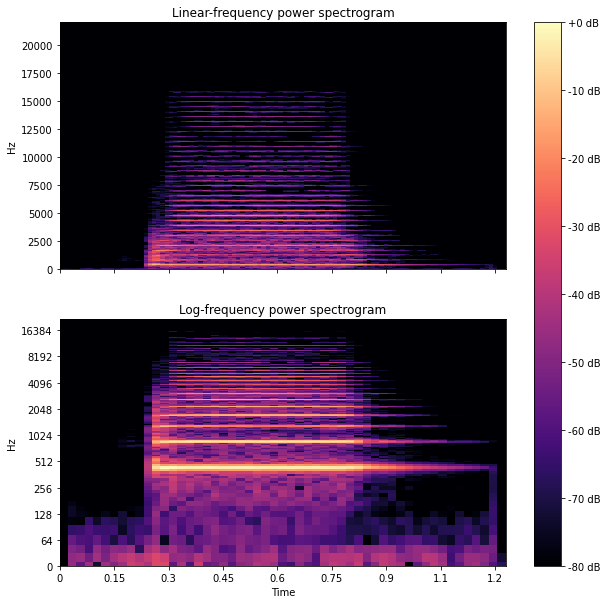

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(10,10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.0f dB")

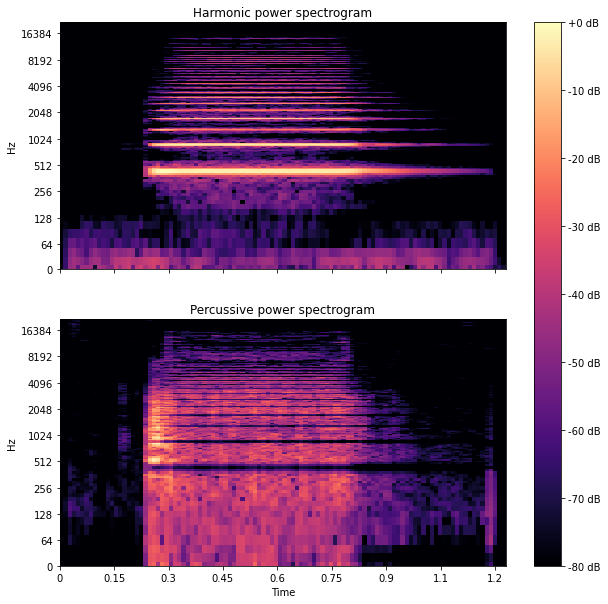

In [ ]:
H, P = librosa.decompose.hpss(S)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10,10))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[0], sr=sr)
ax[0].set(title='Harmonic power spectrogram')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P),ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[1], sr=sr)
ax[1].set(title='Percussive power spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
figures.append(H)

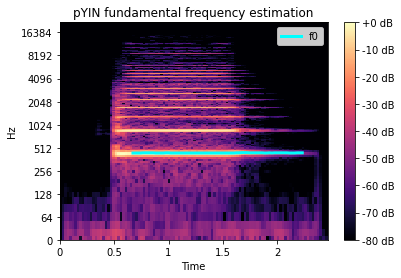

In [ ]:
f0, voiced_flag, voiced_probs = librosa.pyin(y,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'), sr=sr)
times = librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

## Violin

In [ ]:
violin ="./drive/MyDrive/violin/violin_A4_1_fortissimo_arco-normal.mp3"
Audio(violin)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


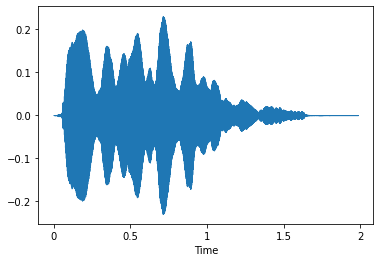

In [ ]:
y, sr = librosa.load(violin,sr=None)
librosa.display.waveshow(y, sr=sr)
S = np.abs(librosa.stft(y))


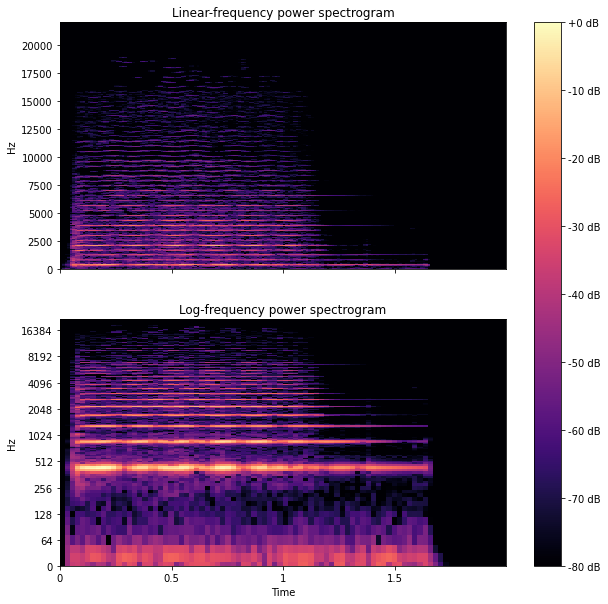

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=True,figsize=(10,10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
ax[0].set(title='Linear-frequency power spectrogram')
ax[0].label_outer()

hop_length = 1024
D = librosa.amplitude_to_db(np.abs(librosa.stft(y, hop_length=hop_length)),
                            ref=np.max)
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax[1])
ax[1].set(title='Log-frequency power spectrogram')
ax[1].label_outer()
fig.colorbar(img, ax=ax, format="%+2.0f dB")


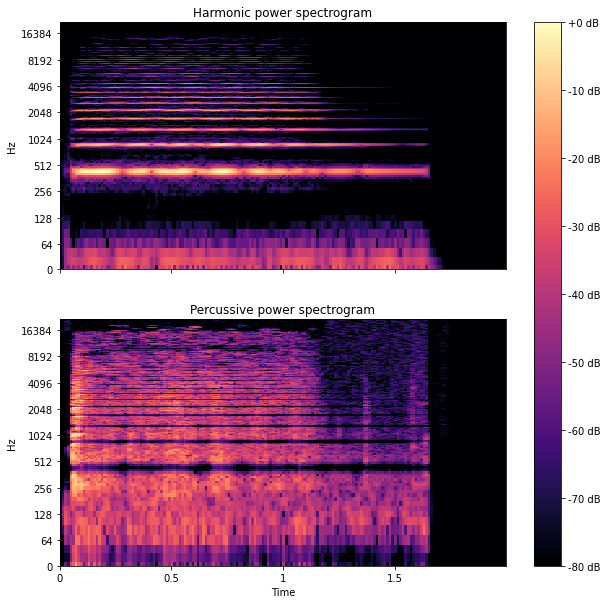

In [ ]:
H, P = librosa.decompose.hpss(S)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True, figsize=(10,10))
librosa.display.specshow(librosa.amplitude_to_db(np.abs(H),
                                                 ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[0], sr=sr)
ax[0].set(title='Harmonic power spectrogram')
ax[0].label_outer()
librosa.display.specshow(librosa.amplitude_to_db(np.abs(P),ref=np.max(np.abs(D))),
                         y_axis='log', x_axis='time', ax=ax[1], sr=sr)
ax[1].set(title='Percussive power spectrogram')
fig.colorbar(img, ax=ax, format='%+2.0f dB')
figures.append(H)

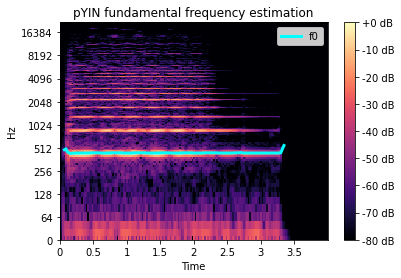

In [ ]:
f0, voiced_flag, voiced_probs = librosa.pyin(y,fmin=librosa.note_to_hz('C2'),fmax=librosa.note_to_hz('C7'), sr=sr)
times = librosa.times_like(f0)

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
librosa.display.specshow(D, y_axis='log', sr=sr, hop_length=hop_length,
                         x_axis='time', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, f0, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

## Comparison of spectrograms

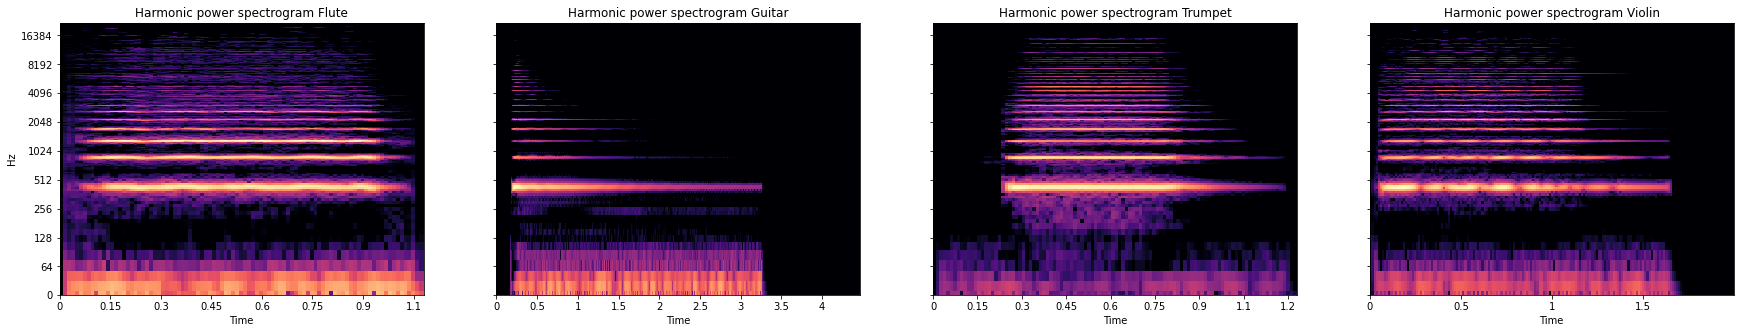

In [ ]:
titles = ['Flute', 'Guitar','Trumpet', 'Violin']
fig, ax = plt.subplots(1, 4, figsize=(30,5))
for i in range(4):
  librosa.display.specshow(librosa.amplitude_to_db(np.abs(figures[i]), ref=np.max(np.abs(D))), y_axis='log', x_axis='time', ax=ax[i], sr=sr)
  ax[i].set(title='Harmonic power spectrogram ' + titles[i])
  ax[i].label_outer()

The harmonic frequencies spectrograms compared in the last cell highlight the instruments "shape". \
The frequencies more intense for each instrument are 440 Hz, this because they represent all the same note, but leaving this out we can see that guitar differentiate particularly itself from other instrument by maintain in time mostly only the main frequency infact it present a prominent "stair" shape. \
Violin instead present in a certain sense a "holed" shape, probably due to the fact that the sound come from a bowed instrument, so it is generated from a bow rubbing on the chords, a movement that is not uniform like it could have been the blow, as in case of wind instruments. \
Without a dubt trumpet and flute have the most similar shape, also due to the fact that are both wind instruments, but they differentiate a bit in the general shape, where the flute one seems to occupy uniformly the frequencies in the time it generates sound meanwhile trumpet seems to lose earlier the higher frequencies, that gives birth to a "stair" shape. \


# Conclusion
We saw that instruments belonging to the same class have a spectrogram similar to each other, but they still present some differencies, so in conclusion I think it is possible to recognize an instrument mean those images: to verify this, a good idea would be to train a convolutional neural network with spectrogram images and see if the resulting model is capable to predict rightly.